### Importing Libraries and Dataset

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 
# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly

In [4]:
tweets_df = pd.read_csv('twitter_data.csv')

In [5]:
tweets_data = tweets_df.drop(['id'],axis=1)

In [6]:
tweets_data.head(5)

,label,tweet
0,0,@user when a father is dysfunctional and is s...
1,0,@user @user thanks for #lyft credit i can't us...
2,0,bihday your majesty
3,0,#model i love u take with u all the time in ...
4,0,factsguide: society now #motivation


In [7]:
tweets_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   label   31962 non-null  int64 
 1   tweet   31962 non-null  object
dtypes: int64(1), object(1)
memory usage: 499.5+ KB


In [8]:
tweets_data['label'].value_counts()

label
0    29720
1     2242
Name: count, dtype: int64

### EDA on Twitter Dataset

<Axes: >

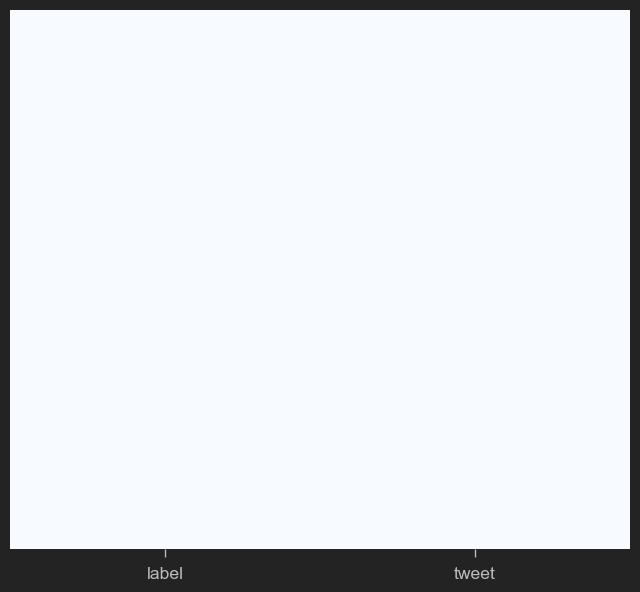

In [9]:
#checking for null values
sns.heatmap(tweets_data.isnull(), yticklabels = False, cbar = False, cmap="Blues")

array([[<Axes: title={'center': 'label'}>]], dtype=object)

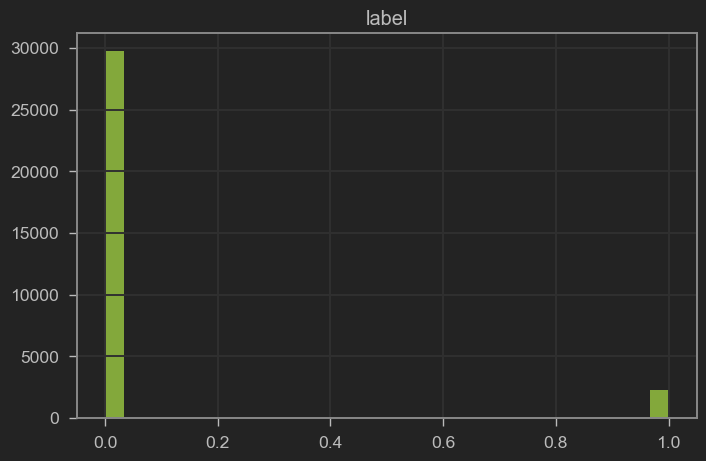

In [10]:
#creating histogram
tweets_data.hist(bins=30, figsize=(8,5),color = 'g')

<Axes: xlabel='label', ylabel='count'>

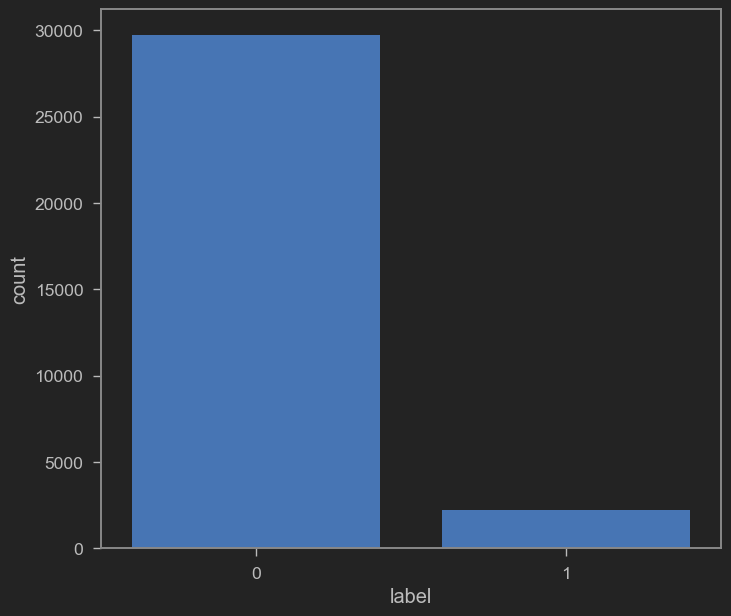

In [11]:
sns.countplot(x='label', data=tweets_data) 

In [12]:
#length of the messages
tweets_data['length'] = tweets_data['tweet'].apply(len)
tweets_data.head()

,label,tweet,length
0,0,@user when a father is dysfunctional and is s...,102
1,0,@user @user thanks for #lyft credit i can't us...,122
2,0,bihday your majesty,21
3,0,#model i love u take with u all the time in ...,86
4,0,factsguide: society now #motivation,39


In [13]:
tweets_data.describe()

,label,length
count,31962.000000,31962.000000
mean,0.070146,84.739628
std,0.255397,29.455749
min,0.000000,11.000000
25%,0.000000,63.000000
50%,0.000000,88.000000
75%,0.000000,108.000000
max,1.000000,274.000000


In [14]:
#to view the shortest message
tweets_data[tweets_data['length']==min(tweets_data['length'])]['tweet'].iloc[0]

'i love you '

In [15]:
#to view message with average no of characters
average_char = np.mean(tweets_data['length'])
average_char
tweets_data[tweets_data['length']==round(average_char)]['tweet'].iloc[0]

' â\x86\x9d #under the spell of brexit referendum - commerzbank   #blog #silver #gold #forex'

<Axes: ylabel='Frequency'>

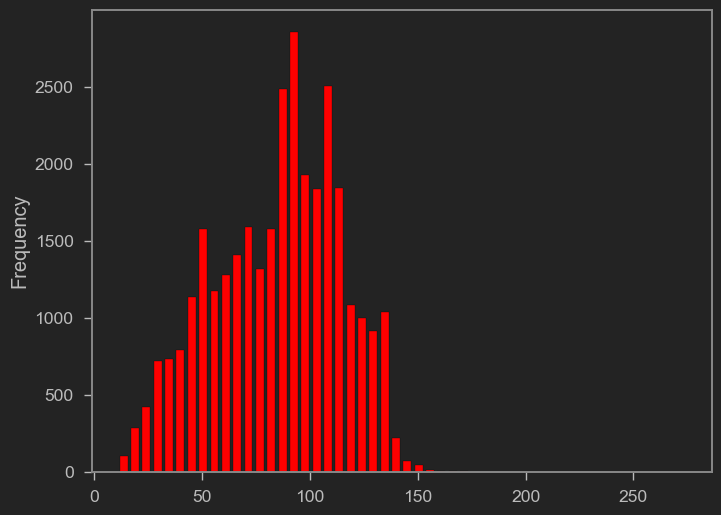

In [16]:
# Plotting the histogram of the length column
tweets_data['length'].plot(bins=50, kind='hist',figsize=(8,6),rwidth=0.7, color='red', edgecolor='black')

### Using Wordcloud

In [17]:
# seperating the dataset based on positive and negative labels
positive = tweets_data[tweets_data['label']==0]
negative = tweets_data[tweets_data['label']==1]

In [18]:
#joining tweets in 1 list as sentences
sentences = tweets_df['tweet'].tolist()

In [19]:
#joining sentences as 1 string
sentences_as_one_string =" ".join(sentences)

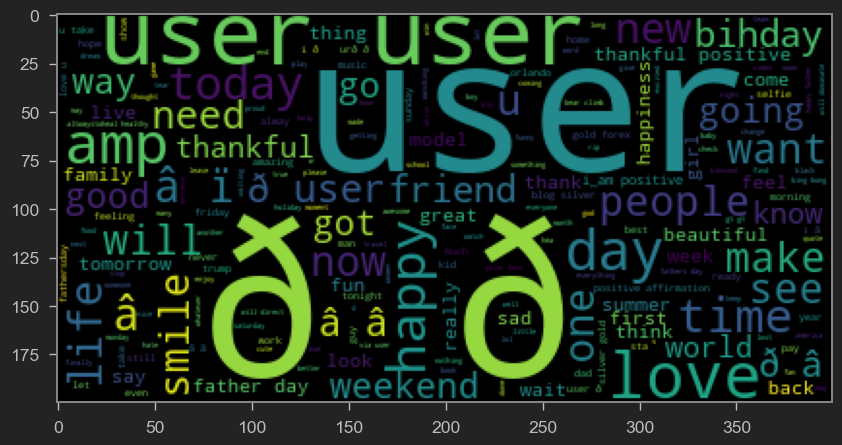

In [20]:
#plotting wordcloud for single sentence string
from wordcloud import WordCloud

plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(sentences_as_one_string))

In [21]:
#for negative data
sentences_neg = negative['tweet'].tolist()

In [22]:
sentences_in_one_neg = " ".join(sentences_neg)

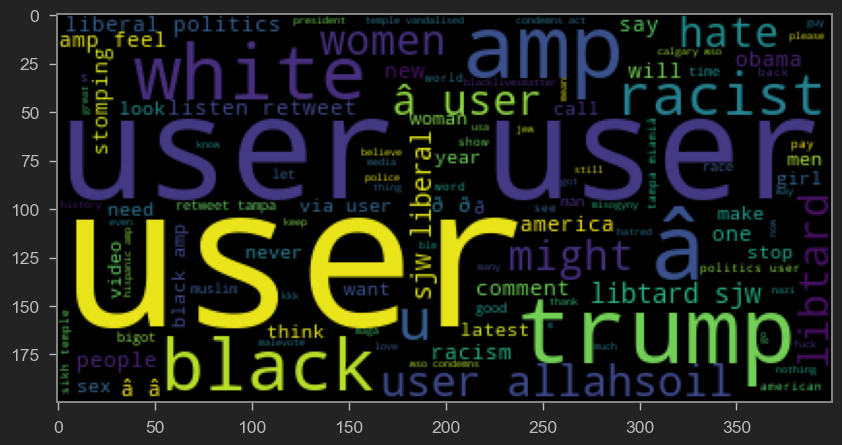

In [23]:
plt.figure(figsize=(10,10))
plt.imshow(WordCloud().generate(sentences_in_one_neg))

### Preprocessing Data

#### Removing Puntuations

In [24]:
import string
string.punctuation # python recognized puntuations

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [25]:
#example on how to remove puntuations from a string
Test = 'Good morning:)... this is Krishnansh here . How are you?!!'
Test_punc_removed = [char for char in Test if char not in string.punctuation]
Test_punc_removed

['G',
 'o',
 'o',
 'd',
 ' ',
 'm',
 'o',
 'r',
 'n',
 'i',
 'n',
 'g',
 ' ',
 't',
 'h',
 'i',
 's',
 ' ',
 'i',
 's',
 ' ',
 'K',
 'r',
 'i',
 's',
 'h',
 'n',
 'a',
 'n',
 's',
 'h',
 ' ',
 'h',
 'e',
 'r',
 'e',
 ' ',
 ' ',
 'H',
 'o',
 'w',
 ' ',
 'a',
 'r',
 'e',
 ' ',
 'y',
 'o',
 'u']

In [26]:
#combining the letters back as a string
text_new = "".join(Test_punc_removed)
text_new

'Good morning this is Krishnansh here  How are you'

#### Removing Stopwords

In [27]:
import nltk # Natural Language tool kit 
nltk.download('stopwords')

from nltk.corpus import stopwords
stopwords.words('english')

[nltk_data] Downloading package stopwords to C:\Users\Krishnansh
[nltk_data]     verma\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [28]:
#converting string to lower
text_new.lower()

'good morning this is krishnansh here  how are you'

In [31]:
#not so common words remaining
text_clean = [word for word in text_new.split() if word not in stopwords.words('english')]
text_clean

['Good', 'morning', 'Krishnansh', 'How']

In [40]:
#another example
Test = 'Good morning beautiful people :)... I am having fun learning Machine learning and AI!!'
test_puntuations = [char for char in Test if char not in string.punctuation]
test1 = "".join(test_puntuations)
test1.lower()
test_clean = [word for word in test1.split() if word not in stopwords.words('english')]
test_clean

['Good',
 'morning',
 'beautiful',
 'people',
 'I',
 'fun',
 'learning',
 'Machine',
 'learning',
 'AI']

### Tokenization

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
sample_data = ['This is the first paper.','This document is the second paper.','And this is the third one.','Is this the first paper?']

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(sample_data)


In [59]:
print(vectorizer.get_feature_names_out())
print(X.toarray()) 

['and' 'document' 'first' 'is' 'one' 'paper' 'second' 'the' 'third' 'this']
[[0 0 1 1 0 1 0 1 0 1]
 [0 1 0 1 0 1 1 1 0 1]
 [1 0 0 1 1 0 0 1 1 1]
 [0 0 1 1 0 1 0 1 0 1]]


In [57]:
#example
mini_challenge = ['Hello World', 'Hello Hello Hello World world', 'Hello Hello World world world World']
vectorizer1 =  CountVectorizer()
x1 = vectorizer1.fit_transform(mini_challenge)
print(vectorizer1.get_feature_names_out())
print(x1.toarray())

['hello' 'world']
[[1 1]
 [3 2]
 [2 4]]


### Creating a Pipeline for Data Preprocessing

In [62]:
#removing puntuations and stopwords in one function
def preprocess (message):
    remove_puntuation_list = [char for char in message if char not in string.punctuation]
    remove_puntuation_string = "".join(remove_puntuation_list)
    remove_puntuation_string.lower()
    remove_stopwords = [word for word in remove_puntuation_string.split() if word not in stopwords.words('english')]
    return remove_stopwords
    

In [63]:
#tokenizing
vectorizer = CountVectorizer(analyzer = preprocess, dtype = np.uint8)
tweets_countvectorizer = vectorizer.fit_transform(tweets_data['tweet'])

In [64]:
tweets_countvectorizer

<31962x47386 sparse matrix of type '<class 'numpy.uint8'>'
	with 264168 stored elements in Compressed Sparse Row format>

In [70]:
X = pd.DataFrame(tweets_countvectorizer.toarray())

In [71]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31962 entries, 0 to 31961
Columns: 47386 entries, 0 to 47385
dtypes: uint8(47386)
memory usage: 1.4 GB
